
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1 - Ejercicio 2
**GRUPO 13**

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns

seaborn.set_context('talk')

!pip install ptitprince

import ptitprince as pt

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [ ]:
# 1) Columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_province', 'work_years_in_company', 
                    'profile_years_experience', 'profile_studies_level', 'profile_studies_level_state', "salary_monthly_BRUTO"]

##Consideraciones
---

Siguiendo el análisis planteado en el Ejercicio 1, focalizaremos el análisis en la sub-población de: **personas que trabajan como Desarrolladores, en modalidad Full-Time, y cuyo sueldo no se encuentra dolarizado.** 

Dado que la principal variable de análisis será el salario, consideramos que es importante tomar una población lo más homogénea posible en términos de variables/características que hemos advertido afectan de manera considerable el salario percibido (si cobra su sueldo en dólares o no, cuánto tiempo dedica a su trabajo, y los distintos rangos jerárquicos dentro de la empresa donde trabaja).



In [ ]:
# Filtrado de la base de datos en función de las características (idem ejercicio 1)
p1=df["salary_in_usd"]!="Mi sueldo está dolarizado"
p2=df['work_contract_type']=="Full-Time"
df['work_role']=np.where((df.work_role=='Frontend dev Jr ') |
                                   (df.work_role=='back end') |
                                    (df.work_role=='trabajo como desarrollador back, pero también tengo que estar haciendo de analista , DBA, dev frontend y a veces de helpdesk') 
                                    ,'Developer' ,df.work_role)

p3= df["work_role"].isin((['Developer','Software engineer','Analista/desarrollador','Technical Lead Devops']))
df_fil=df[p1 & p2 & p3]


Luego, calculamos los percentiles para determinar si existen o no valores outliers en términos del Salario Bruto, para nuestra sub-población de referencia.

In [ ]:
df_fil.salary_monthly_NETO.quantile([0.05,.10,.95,.98, .99, .995, .998, .999])

0.050     30000.0
0.100     37200.0
0.950    130000.0
0.980    150000.0
0.990    173500.0
0.995    194846.8
0.998    260800.0
0.999    290800.0
Name: salary_monthly_NETO, dtype: float64

##Consideraciones
---


Al igual que en el ejercicio1, hemos decidido restringir nuestra muestra a aquellas personas que cobran igual o más de 37.200 pesos e igual o menos de 260.800 pesos, valores que se corresponden con los percentiles del 10% y 99,8%, reduciendo así en un 10,2% los valores de la muestra. 

La justificación sobre esta elección se encuentra en el Ejercicio 1.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


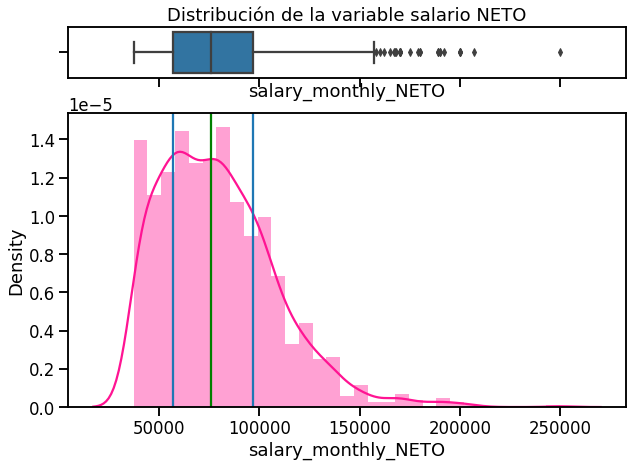

In [ ]:
#Eliminación de valores inferiores al percentil 0.10 y superiores al percentil 0.998
df_fil2=df_fil[(df_fil.salary_monthly_NETO > df_fil.salary_monthly_NETO.quantile(0.10)) & (df_fil.salary_monthly_NETO < df_fil.salary_monthly_NETO.quantile(.998))]

#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_fil2.salary_monthly_NETO, ax=ax_box)
sns.distplot(df_fil2.salary_monthly_NETO, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_fil2.salary_monthly_NETO, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="deeppink")

plt.axvline(df_fil2.salary_monthly_NETO.quantile(0.25))
plt.axvline(df_fil2.salary_monthly_NETO.quantile(0.50),color='g')
plt.axvline(df_fil2.salary_monthly_NETO.quantile(0.75))
 
ax_box.set_title("Distribución de la variable salario NETO")
plt.show()


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




##Respuesta

Las herramientas visuales y modelos que pueden utilizarse para analizar distribuciones conjuntas dependen en gran medida del tipo de variables.
Entre los modelos de densidad o probabilidad conjunta que se podrían utilizar encontramos: la distribución normal o distribución normal bivarida, binomial, uniforme, exponencial, chi-cuadrado, entre las principales. Las características de los datos determinarán cuál modelo sea el que ofrezca un mejor ajuste.
Entre las herramientas visuales, se podrían mencionar las tablas de contingencia (entre variables categóricas, o numéricas categorizadas) o distintos tipos de gráficos entre los cuales se podrían mencionar histogramas, gráficos de dispersión o scatterplots(entre dos variables numéricas), gráficos de barra y puntos (para variables categóricas, o entre una categórica y otra numérica), boxplot (variables categóricas y numéricas) entre los principales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


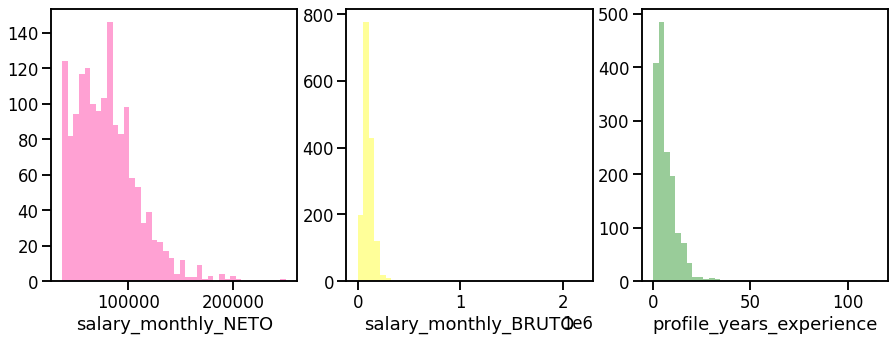

In [ ]:
# las variables elegidas son "salary_monthly_NETO", "work_years_in_company", "profile_years_experience", "work_province", "profile_studies_level"
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,5))

seaborn.distplot(df_fil2.salary_monthly_NETO,  bins=40, kde=False,color="deeppink",ax=axs[0])
seaborn.distplot(df_fil2.salary_monthly_BRUTO,  bins=40,kde=False, color="yellow",ax=axs[1])  #el filtrado original se hizo sobre salario Neto, pero en términos de la variable salario bruto aún quedaron outliers
seaborn.distplot(df_fil2.profile_years_experience,  bins=40,kde=False, color="green",ax=axs[2])  #acá deberíamos restringir a profile_years_experience<60
plt.ticklabel_format(style='plain', axis='x') 

In [ ]:
df_fil2["work_province"].value_counts() 
# Están las 24, la más frecuente es CABA. Generaría una nueva variable que sea CABA vs Resto del país. 
# Lo ocultaría después

Ciudad Autónoma de Buenos Aires    981
Provincia de Buenos Aires          134
Córdoba                            108
GBA                                102
Santa Fe                            93
Mendoza                             33
Entre Ríos                          19
Jujuy                               11
Neuquén                             11
Río Negro                           10
Chubut                               7
La Rioja                             6
Tucumán                              6
San Luis                             5
Corrientes                           4
Chaco                                4
La Pampa                             4
Misiones                             4
Salta                                3
Tierra del Fuego                     2
Formosa                              2
Catamarca                            1
San Juan                             1
Santa Cruz                           1
Name: work_province, dtype: int64

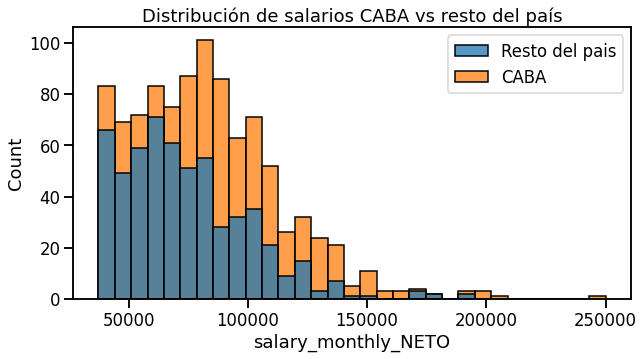

In [ ]:
plt.figure(figsize=(10,5))
seaborn.histplot(data=df_fil2,x=df_fil2.salary_monthly_NETO,hue=np.where(df_fil2.work_province=="Ciudad Autónoma de Buenos Aires",
                                                           "CABA",
                                                           "Resto del pais"))

plt.title('Distribución de salarios CABA vs resto del país')
plt.show()

En el análisis exploratorio inicial se advirtieron outliers para la variable representativa de los Años de experiencia (superiores al valor 100, lo cual resulta poco razonable), en adelante se introducirá un nuevo filtro para esa variable. Tomaremos solo aquellas observaciones para las cuales los años de experiencia laboral sean inferiores a 60.

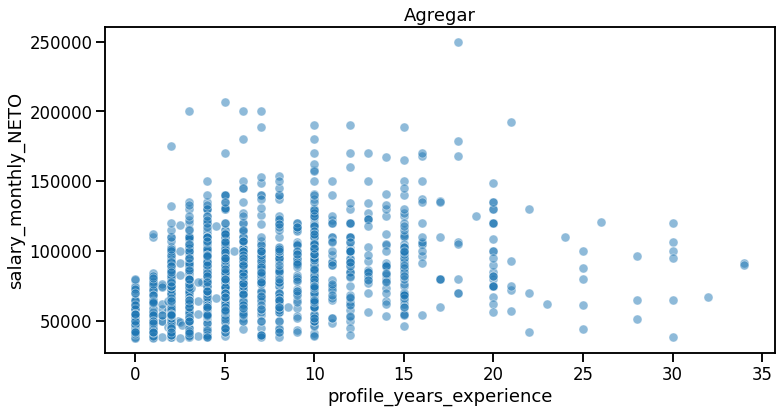

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.scatterplot(data=df_fil2[df_fil2["profile_years_experience"]<60],alpha=0.5 ,x="profile_years_experience", y="salary_monthly_NETO")
plt.title("Agregar")
plt.show()

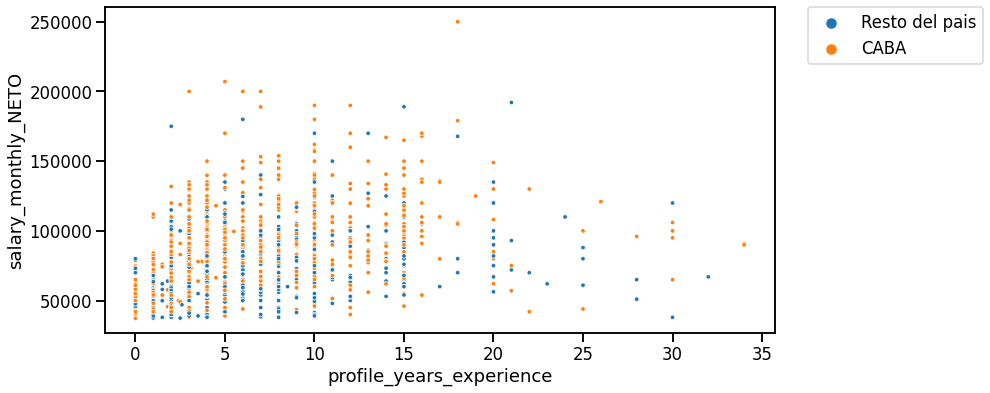

In [ ]:
plt.figure(figsize=(12,6))
mask = df_fil2['profile_years_experience'] < 60
seaborn.scatterplot(data=df_fil2[mask],  
                     x="profile_years_experience", y="salary_monthly_NETO",
                    marker='.',
                    hue=np.where(df_fil2[mask].work_province=="Ciudad Autónoma de Buenos Aires",
                                                           "CABA",
                                                           "Resto del pais"))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

En este gráfico es posible observar la relación entre el salario neto y los años de experienia. La relación entre ambas variables no resulta muy clara en una primera instancia, podría decirse que es levemente positiva si se tienen en cuenta los primeros 15 años de experiencia, pero a partir de entonces no se hace visible que más años de experiencia se asocien a un mayor salario neto. 

Por tal razón, se incluyó la diferenciación en función de la localización de los Desarrolladores. En este caso, se advierte una mayor presencia de puntos naranjas (representativos de los trabajadores de CABA) entre los que tienen los mayores salarios netos para cada valor de los años de experiencia. Esto era esperable dado que tanto el nivel como el costo de vida suele ser más alto en las capitales que en el resto del país.


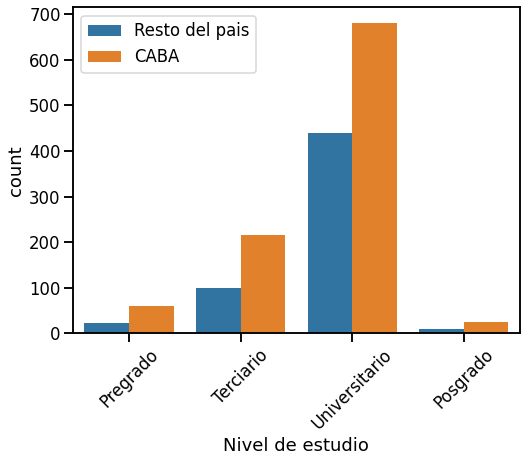

In [ ]:
new_groups = {
    'Posdoctorado': 'Posgrado',
    'Doctorado': 'Posgrado',
    'Primario': 'Pregrado',
    'Secundario': 'Pregrado'
}

grouped_studies_level = df_fil2.profile_studies_level.replace(new_groups)
fig = plt.figure(figsize=(8,6))
seaborn.countplot(data=df_fil2, x=grouped_studies_level,
                 hue=np.where(df_fil2.work_province=="Ciudad Autónoma de Buenos Aires",
                                                           "CABA",
                                                           "Resto del pais"), order = ['Pregrado', 'Terciario', 'Universitario', 'Posgrado'])
plt.xticks(rotation=45)
plt.xlabel("Nivel de estudio")
plt.ticklabel_format(style='plain', axis='y')

En este gráfico, podemos comparar la distribución de las variables categóricas nivel de estudio y lugar de trabajo (Ciudad Autónoma de Buenos Aires vs resto del país). Por un lado, podemos observar que en CABA hay más desarrolladores que en el resto del país y, por otro lado, que la cantidad de desarrolladores depende del nivel de estudio que posee, existiendo una tendencia similar tanto para los que trabajan en CABA como para los que trabajan en el resto del país. En este sentido, podemos ver que la mayoría de los desarrolladores poseen estudios universitarios, seguidos por los que poseen nivel terciario, luego pregrado y, por último, posgrado.   

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



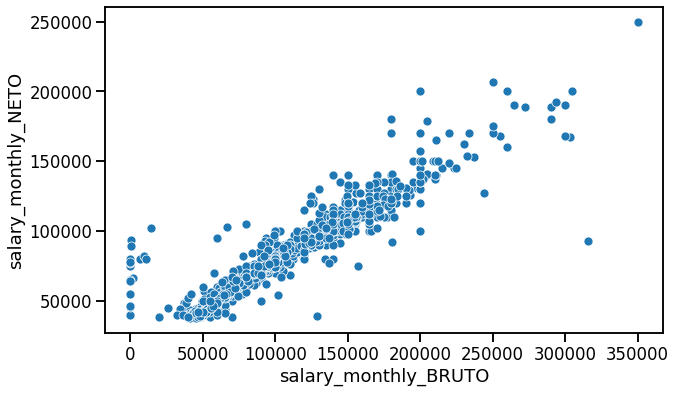

In [ ]:
#Análisis de la correlación entre salario bruto y salario neto
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df_fil2[df_fil2["salary_monthly_BRUTO"]<500000],  
                    x='salary_monthly_BRUTO', y='salary_monthly_NETO')
plt.ticklabel_format(style='plain')
#Habían quedado en la base de datos dos observaciones con el salario bruto outlier parece. Veamos de eliminarlos para la comparación.

In [ ]:
#correlación
correl_pearson=df_fil2["salary_monthly_BRUTO"].corr(df_fil2["salary_monthly_NETO"], method='pearson')   #otros métodos posibles: spearman, kendall
correl_pearson

0.5831927353126511

Se advierte que sí existe una correlación positiva entre las variables de salario bruto y neto, la cual resulta más evidente aún luego de eliminar los datos outliers de la variable salario bruto (que no habían sido eliminados anteriormente).

No obstante, la correlación no es lo suficientemente alta como para tomar la decisión de eliminar la columna de salario bruto. Si lo hiciéramos, probablemente perderíamos información relevante dependiendo del análisis que se quiera hacer. Por ejemplo, al observar el scatterplot, vemos que se traza una línea de valores que van desde 37000 a más de 100000 pesos de salario neto para 0 (o casi 0) pesos de salario bruto. Si bien esto se podría considerar un error y eliminar estos valores como outliers, nuestro conocimiento nos permite inferir que esta situación se puede tratar de trabajo informal (no remunerativo, "en negro", etc.), empleados sub-declarados, o de personas que facturan sus servicios como monotributistas para la modalidad full-time, que si bien es incorrecto, sucede a menudo. Es por ello que en estos casos tenemos salario neto, pero nada (o muy poco) salario bruto. Ahora bien, si no tenemos la columna de salario bruto, no podrías obtener esta información importante. 

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
#Primero calculo las medidas resumen en función del nivel de estudio, ordenado, que incluya el count de casos así en base a eso elegimos qué grupos quedarnos 
grouped=df[['profile_studies_level', "salary_monthly_NETO"]].groupby('profile_studies_level').describe()
grouped.columns = grouped.columns.droplevel(level=0)
grouped.sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
profile_studies_level,,,,,,,,
Universitario,3991.0,97410.224414,99056.902960,1.0,53220.0,80000.0,108000.0,2080000.0
Terciario,1106.0,80814.433784,73045.051749,1.0,46000.0,68000.0,93000.0,1000000.0
Secundario,434.0,82686.351857,89015.514211,1.0,42250.0,65000.0,93000.0,1250000.0
Posgrado,317.0,124166.795300,110533.626251,2.0,76000.0,100000.0,143175.0,1190000.0
Doctorado,29.0,91629.115517,80804.752362,70.0,45000.0,88900.0,100000.0,350000.0
Posdoctorado,4.0,529875.000000,664606.446829,87000.0,104250.0,266250.0,691875.0,1500000.0
Primario,2.0,87500.000000,45961.940777,55000.0,71250.0,87500.0,103750.0,120000.0


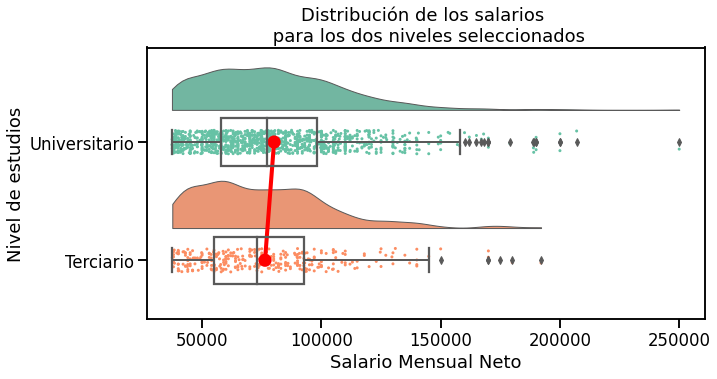

In [ ]:
# Quedarnos con "Terciario" y "Universitario"  
plt.figure(figsize=(10,5))

ax = pt.RainCloud(y ='salary_monthly_NETO', x='profile_studies_level',data = df_fil2[df_fil2.profile_studies_level.isin(['Universitario','Terciario'])], 
                  orient='h',width_viol = .8, width_box = 0.4, move = 0.0,pointplot = True
                  )
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Nivel de estudios")

plt.title("Distribución de los salarios \n para los dos niveles seleccionados")

plt.show()

In [ ]:
Universitario= df_fil2[df_fil2.profile_studies_level=="Universitario"].salary_monthly_NETO

In [ ]:
Terciario=df_fil2[df_fil2.profile_studies_level=="Terciario"].salary_monthly_NETO

In [ ]:
len(Universitario)

1120

In [ ]:
Universitario.var()

856033853.7801287

In [ ]:
len(Terciario)

314

In [ ]:
Terciario.var()

786146849.2278954

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.ttest_ind(Universitario, Terciario, equal_var = False)

Ttest_indResult(statistic=2.099110762332537, pvalue=0.03628890918232016)

##Respuesta

Las variables nivel de estudio y salario neto no parecieran ser independientes. Esto surge de la comparación entre las medidas de centralización (media o mediana según el tipo de distribución de los datos) del salario neto para desarrolladores con niveles de estudios universitarios y terciarios. Como podemos observar, tanto la media y mediana del salario neto para desarrolladores con estudios universitarios son mayores en comparación con los que poseen estudios terciaros. Es decir, el salario neto que cobre un desarrollador en promedio difiere según el nivel de estudios que posea. Esta diferencia fue comprobada estadísticamente a partir de la prueba de hipótesis de Whelch que arrojó como resultado un p-valor menor a 0,05, permitiendo rechazar la hipótesis nula de igualdad entre la media del salario neto de los desarrolladores con estudios universitarios y la de los desarrolladores con estudios terciarios.



## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


#Respuesta

Para responder a este ejercicio, retomamos el gráfico que habíamos presentado hacia el final del punto a de este ejercicio en el cual comparamos por medio de un gráfico de dispersión las variables años de experiencia (eje x) y el salario neto (eje y), diferenciando los puntos por color según si trabajan en la Ciudad Autónoma de Buenos Aires o en el resto del país.

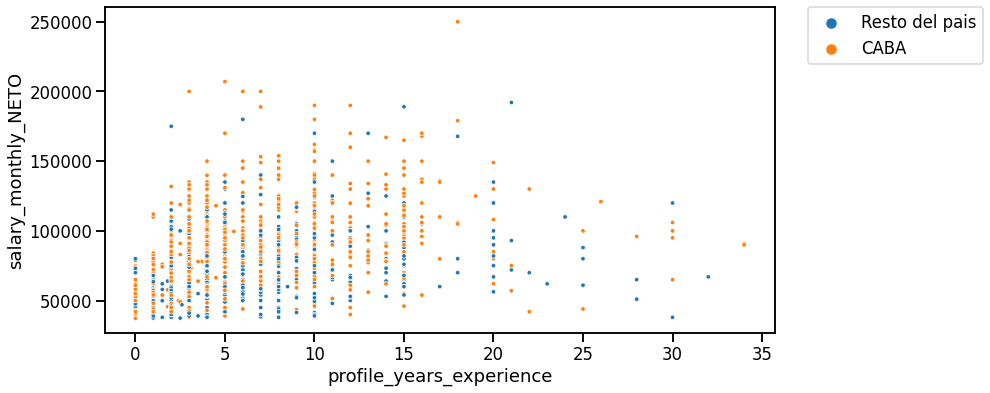

In [ ]:
plt.figure(figsize=(12,6))
mask = df_fil2['profile_years_experience'] < 60
seaborn.scatterplot(data=df_fil2[mask],  
                     x="profile_years_experience", y="salary_monthly_NETO",
                    marker='.',
                    hue=np.where(df_fil2[mask].work_province=="Ciudad Autónoma de Buenos Aires",
                                                           "CABA",
                                                           "Resto del pais"))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)